In [ ]:
import gempy as gp
import gempy_viewer as gpv

In [18]:
path_interf = "input_data/topography/2018_interf.csv"
path_orient = "input_data/topography/2018_orient_clust_n_init5_0.csv"
path_dem = "input_data/topography/_cropped_DEM_coarse.tif"

geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Claudius',
    extent=[729550.0, 751500.0, 1913500.0, 1923650.0, -1800.0, 800.0],
    resolution=None,
    refinement=6,
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=path_orient,
        path_to_surface_points=path_interf,
    )
)

gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
            'section1': ([732000, 1916000], [745000, 1916000], [200, 150])
    }
)

gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object={
            'fault_left': 'fault_left',
            'fault_right': 'fault_right',
            'fault_lr': 'fault_lr',
            'Trias_Series': ('TRIAS', 'LIAS'),
            'Carbon_Series': 'CARBO',
            'Basement_Series': 'basement'
    },
    remove_unused_series=True
)

Active grids: GridTypes.OCTREE|SECTIONS|NONE
Could not find element 'basement' in any group.


StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=fault_left,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault_left,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=fault_right,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault_right,
	color=#ff3f20,
	is_active=True
)
]
),
StructuralGroup(
	name=fault_lr,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=fault_lr,
	color=#443988,
	is_active=True
)
]
),
StructuralGroup(
	name=Trias_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=TRIAS,
	color=#ffbe00,
	is_active=True
),
Element(
	name=LIAS,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Carbon_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=CARBO,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

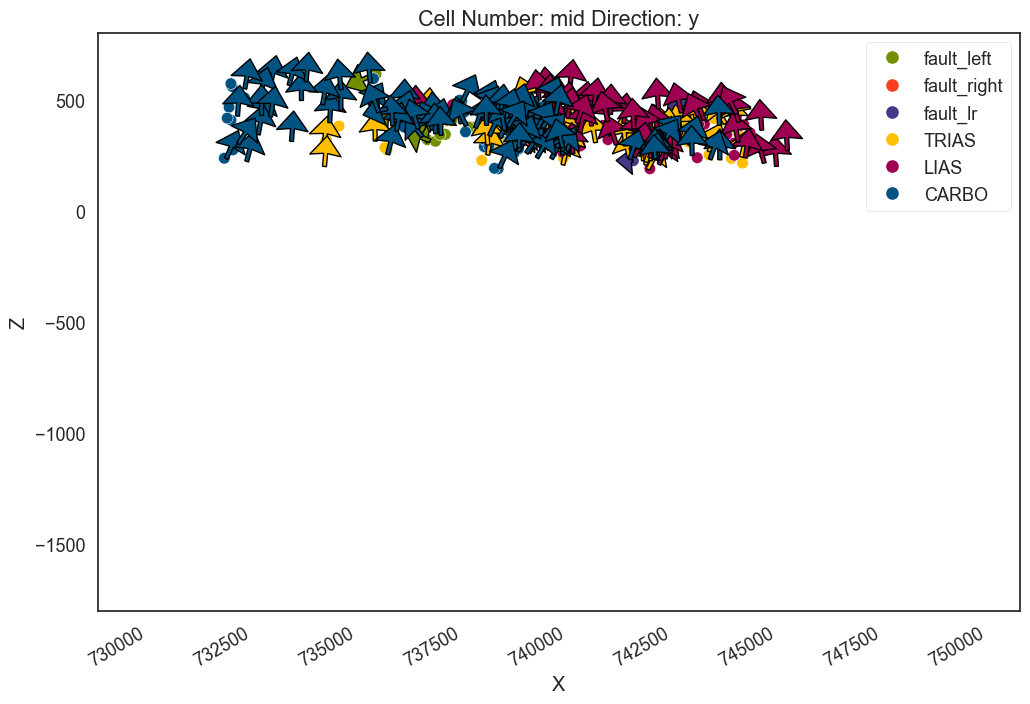

In [20]:
#gráfico en 2D
gpv.plot_2d(geo_model, direction='y')

Active grids: GridTypes.OCTREE|TOPOGRAPHY|SECTIONS|NONE


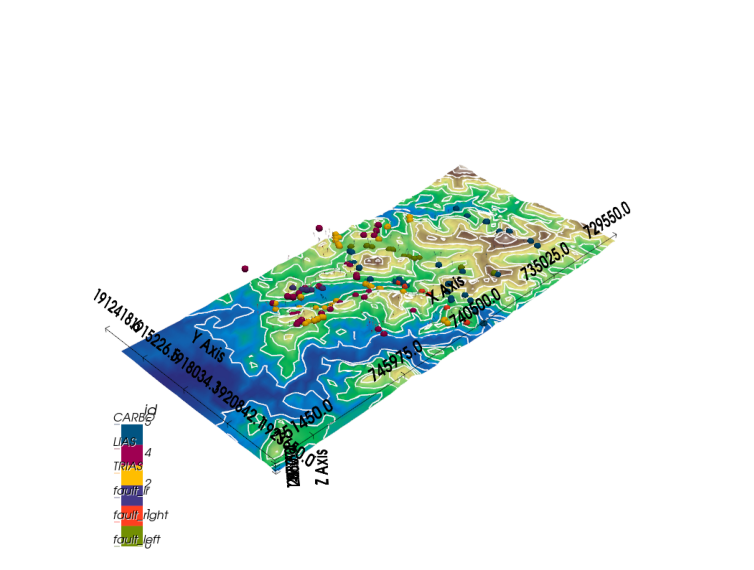

In [23]:
#gráfico en 3D
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=path_dem,
    crop_to_extent=[729550.0, 751500.0, 1913500.0, 1923650.0]
)

gpv.plot_3d(geo_model, show_topography=True, ve=1, image=True)